In [ ]:
#Importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
#Loading the dataset
data = pd.read_csv ('/Users/tnluser/Downloads/HeartDiseasedata.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Looking for null value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#column details

#age
#sex
#Chest pain (4 Types)
#resting blood pressure
#Cholesterol in mg/dl
#fasting blood sugar > 120mg/dl
#resting ECG results (Values 0,1,2)
#Maximum heart rate achieved
#exercise induced angina
#Oldpeak = ST depression induced by exercise relative to rest
#Slope of peak execrise ST segment
#No. of major vessels (0-3) colored by flouroscopy
# thal: 0= normal, 1= fixed defect; 2= reversible defect;
#target = affected people ; 0= no; 1=yes

data.columns.to_list()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
# Renaming column Values

#Confirmed Heart disease column
data.loc[data['target']==1, 'target'] = "Heart Disease"
data.loc[data['target']==0, 'target'] = "No Heart Disease"

#Gender
data.loc[data['sex']==1, 'sex'] = 'Male'
data.loc[data['sex']==0, 'sex'] = 'Female'

#Type of chest pain
data.loc[data['cp']==0, 'cp']= 'Type 0'
data.loc[data['cp']==1, 'cp']= 'Type 1'
data.loc[data['cp']==2, 'cp']= 'Type 2'
data.loc[data['cp']==3, 'cp']= 'Type 3'

#Fasting blood sugar
data.loc[data['fbs']==0, 'fbs']='<125mg/dl'
data.loc[data['fbs']==1, 'fbs']='>125mg/dl'

In [ ]:
#data head
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Type 0,125,212,<125mg/dl,1,168,0,1.0,2,2,3,No Heart Disease
1,53,Male,Type 0,140,203,>125mg/dl,0,155,1,3.1,0,0,3,No Heart Disease
2,70,Male,Type 0,145,174,<125mg/dl,1,125,1,2.6,0,0,3,No Heart Disease
3,61,Male,Type 0,148,203,<125mg/dl,1,161,0,0.0,2,1,3,No Heart Disease
4,62,Female,Type 0,138,294,>125mg/dl,1,106,0,1.9,1,3,2,No Heart Disease


In [ ]:
#Statistical inforamtion of the data

data[["age", "trestbps", "chol", "thalach"]].describe()

,age,trestbps,chol,thalach
count,1025.000000,1025.000000,1025.00000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146
std,9.072290,17.516718,51.59251,23.005724
min,29.000000,94.000000,126.00000,71.000000
25%,48.000000,120.000000,211.00000,132.000000
50%,56.000000,130.000000,240.00000,152.000000
75%,61.000000,140.000000,275.00000,166.000000
max,77.000000,200.000000,564.00000,202.000000


In [ ]:
#correction of the data

data[["age", "trestbps", "chol", "thalach"]].corr()

,age,trestbps,chol,thalach
age,1.000000,0.271121,0.219823,-0.390227
trestbps,0.271121,1.000000,0.127977,-0.039264
chol,0.219823,0.127977,1.000000,-0.021772
thalach,-0.390227,-0.039264,-0.021772,1.000000


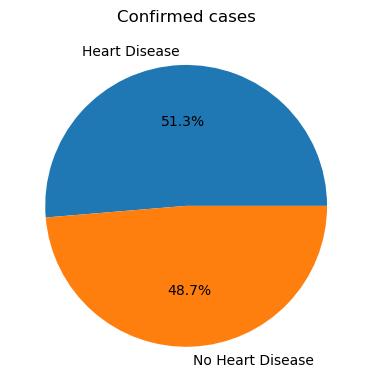

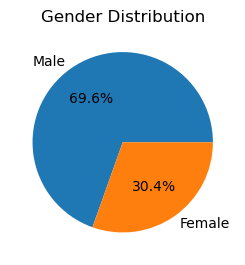

In [ ]:
#Calculate the counts for each sex and confirmed patients

target_count=data['target'].value_counts()
sex_count= data['sex'].value_counts()

#Plot area
plt.figure(figsize=(10,15))

#Dividing plot area and plotting confirmed cases
plt.subplot(1,2,1)
plt.pie(target_count,labels =target_count.index, autopct="%1.1f%%")
plt.title("Confirmed cases")
plt.show()

#Plot according to Gender distribution
plt.subplot(1,2,2)
plt.pie(sex_count, labels =sex_count.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

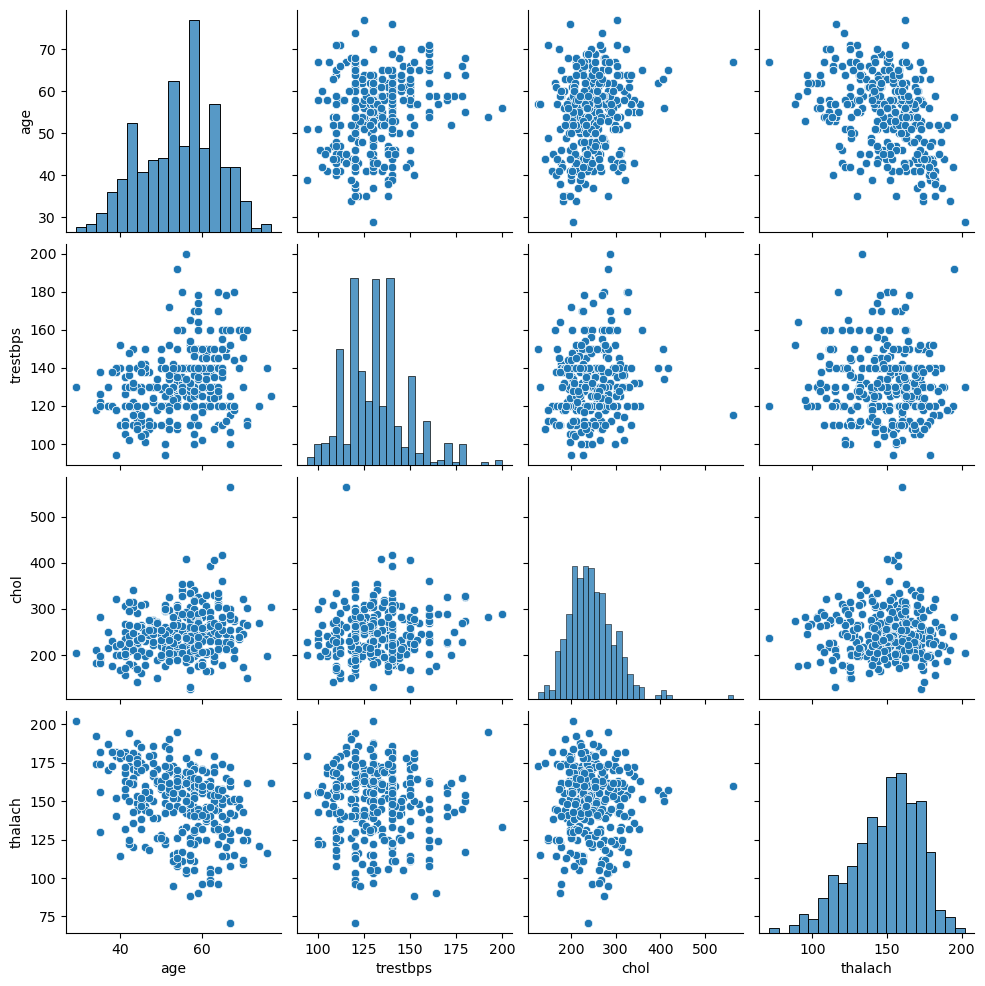

In [ ]:
#Data distrbution chart; pair plot chart showin correlation and histogram
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach']])

Text(0.5, 1.0, 'Age vs Resting Blood Pressure')

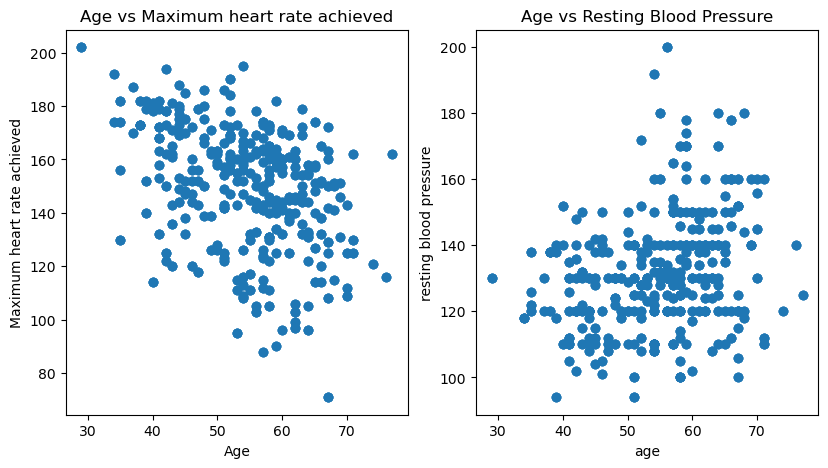

In [ ]:
#Creating Plot area
plt.figure(figsize=(15,5))

#dividing plot area and maximum heart rate achieved
plt.subplot(1,3,1)
plt.scatter(data['age'], data['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum heart rate achieved')
plt.title('Age vs Maximum heart rate achieved')


#Dividing plot area and resting blood pressure
plt.subplot(1,3,2)
plt.scatter(data['age'], data['trestbps'])
plt.xlabel('age')
plt.ylabel('resting blood pressure')
plt.title('Age vs Resting Blood Pressure')



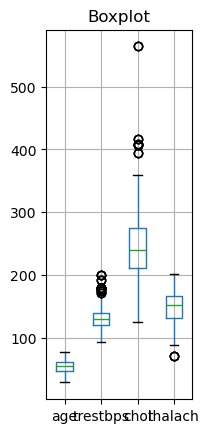

In [ ]:
#Boxplot to look at outliers
plt.subplot(1,3,3)
data[['age', 'trestbps', 'chol', 'thalach']].boxplot()
plt.title('Boxplot')
plt.show()

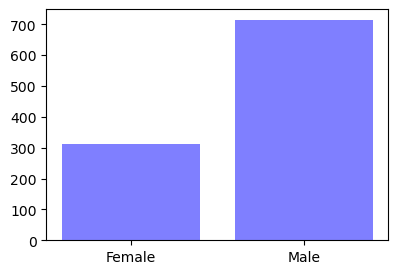

In [ ]:
#Creating chart area
plt.figure(figsize=(15,3))

#Age vs Confirmed Cases
plt.subplot(1,3,1)
b= data.groupby('sex') ['target'].count()
plt.bar(b.index, b.values, color='b', alpha= .5)
plt.xlabel=('sex')
plt.ylabel=('No.of cases')
plt.title=('Age vs Confirmed cases')



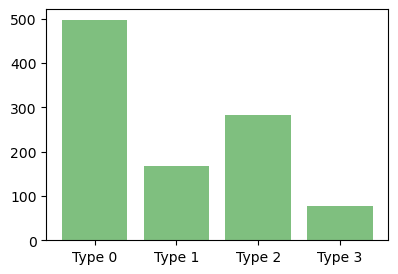

In [ ]:
#Chest pain type vs confirmed cases
plt.figure(figsize= (15,3))
c = data.groupby('cp') ['target'].count()
plt.subplot(1,3,2)
plt.bar(c.index, c.values, color='g', alpha=.5)
plt.xlabel=('chest pain type')
plt.ylabel=('Confirmed cases')
plt.title=('Chest pain type vs confirmed cases')



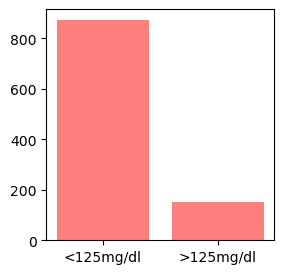

In [ ]:
#Chest pain type vs fasting blood sugar >120mg/dl
plt.figure(figsize=(10,3))
d=data.groupby('fbs') ['target'].count()
plt.subplot(1,3,3)
plt.bar(d.index, d.values, color= 'r', alpha=.5)
plt.xlabel=('Fasting Blood Sugar')
plt.ylabel=('No. of Cases')
plt.title=('Chest Pain Type vs fasting blood sugar >120mg/dl')
plt.show()


**Thank You**